# Prelucrarea Semnalelor
## Laborator 5
### Miu Elena Adania
### Grupa 333

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Ex1.
### Scopul acestui exercitiu este de a calcula frecventele prezente in semnalul prezentat in Sectiunea 2.

### a) Care este frecventa de esantionare a semnalului din Train.csv?

#### Din suportul de laborator stim ca numarul de masini care trec prin intersectie este masurat din ora in ora => avem 1 esantion / ora
#### => Fs = 1 / 3600

In [4]:
Fs = 1 / 3600
print(Fs)

0.0002777777777777778


### b) Ce interval de timp acopera esantioanele din fisier?


#### Esantioanele din fisier acopra un interval de timp determinat de
#### Nr esantioane * Perioada de esantionare = 18288 * 3600

In [5]:
print(18288 * 3600) # in secunde

65836800


In [6]:
print((18288 * 3600) / (3600 * 24)) # in zile

762.0


### c) Considerand ca semnalul a fost esantionat corect (fara aliere) si optim, care este frecventa maxima prezenta in semnal?

#### Conform teoremei Nyquist-Shannon, frecventa de esantionare minima trebuie sa fie de cel putin doua ori mai mare decat cea mai inalta frecventa a semnalului de intrare pentru a evita fenomenul de aliere.
#### => Frecventa maxima prezenta in semnal = Fs / 2

In [7]:
F_max = Fs / 2
print(F_max)

0.0001388888888888889


### d) Utilizati functia np.fft.fft(x) pentru a calcula transformata Fourier a semnalului si afisati grafic modulul transformatei.
### Deoarece valorile pe care le veti calcula sunt in Hz, este important sa definiti corect frecventa de esantionare (astfel incat valorile de frecvente pe care le obtineti utilizand ultima secventa de cod din Sectiunea 3 sa aiba interpretare corecta din punct de vedere fizic).

In [8]:
x = np.genfromtxt('Train.csv', delimiter=',', usecols=2, skip_header=1)

DFT = abs(np.fft.fft(x) / 18288)

DFT = DFT[:18288//2]

Frecvente = Fs * np.linspace(0, 18288 / 2, 18288 // 2) / 18288

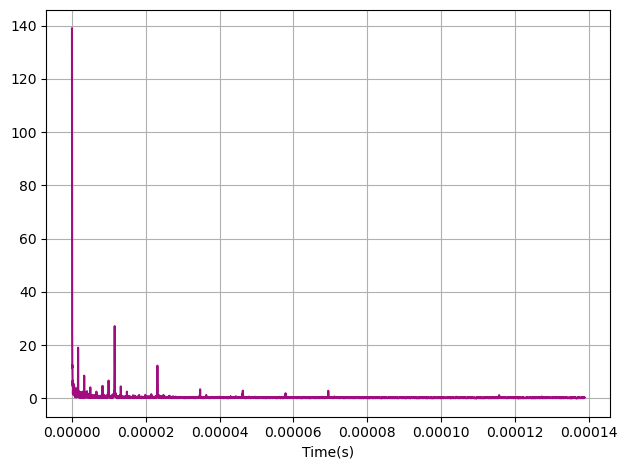

In [9]:
plt.plot(Frecvente, DFT, color='#9F0D7F')
plt.xlabel('Time(s)')
plt.grid(True)
plt.tight_layout()
plt.show()

### e) Prezinta acest semnal o componenta continua? Daca da, eliminati-o. Daca nu, specificati cum ati determinat.

#### Din graficul de la punctul anterior putem observa ca pentru 0 Hz avem valoare nenula => component continu
#### Un semnal cu componentă continua este de forma y(t) = x0 + x(t)
#### Daca scoatem constanta, scapam de componenta continua

In [10]:
comp_cont = DFT[0]
print("Componenta continua este", comp_cont)

Componenta continua este 138.95811461067368


In [11]:
x2 = x - comp_cont

DFT2 = abs(np.fft.fft(x2) / 18288)
DFT2 = DFT2[:18288//2]

Frecvente2 = Fs * np.linspace(0, 18288 / 2, 18288 // 2) / 18288

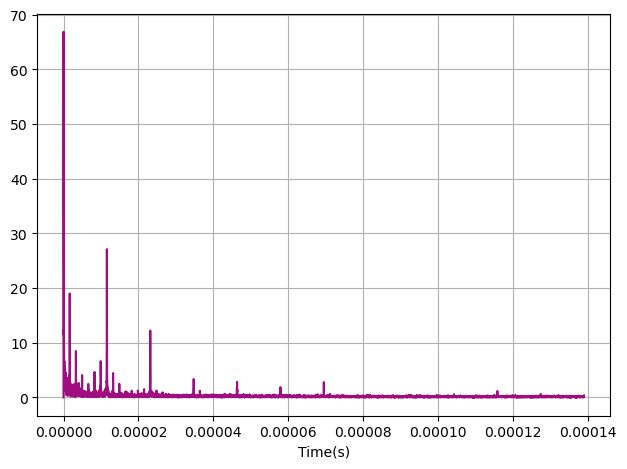

In [12]:
plt.plot(Frecvente2, DFT2, color='#9F0D7F')
plt.xlabel('Time(s)')
plt.grid(True)
plt.tight_layout()
plt.show()

### f) Care sunt frecventele principale continute in semnal, asa cum apar ele in transformata Fourier? Mai exact, determinati primele 4 cele mai mari valori ale modulului transformatei si specificati caror frecvente (in Hz) le corespund. Caror fenomene periodice din semnal se asociaza fiecare?

In [13]:
F1, F2, F3, F4 = 0, 0, 0, 0

for i in range(1, len(Frecvente2)):
    if DFT2[i] > DFT2[F1]:
        F4 = F3
        F3 = F2
        F2 = F1
        F1 = i
    elif DFT2[i] > DFT2[F2]:
        F4 = F3
        F3 = F2
        F2 = i    
    elif DFT2[i] > DFT2[F3]:
        F4 = F3
        F3 = i
    elif DFT2[i] > DFT2[F4]:
        F4 = i
        
print(f"Frecventa {Frecvente2[F1]} Modul {DFT2[F1]}")
print(f"Frecventa {Frecvente2[F2]} Modul {DFT2[F2]}")
print(f"Frecventa {Frecvente2[F3]} Modul {DFT2[F3]}")
print(f"Frecventa {Frecvente2[F4]} Modul {DFT2[F4]}")

Frecventa 1.5190734866989925e-08 Modul 66.85385766393449
Frecventa 3.038146973397985e-08 Modul 35.2191729779369
Frecventa 1.1575339968646325e-05 Modul 27.102022287615565
Frecventa 4.557220460096978e-08 Modul 25.21991648404482


### g) Incepand de la un esantion ales de voi mai mare decat 1000, vizualizati, pe un grafic separat, o luna de trafic. Alegeti esantionul de start astfel incat reprezentarea sa inceapa intr-o zi de luni.

In [19]:
start = 24 * 7 * 10  # 1 esantion pe ora incepand din luna a 10-a 
end = start + 7 * 30

x3 = np.arange(start, end, 1)
y = x[start : end]

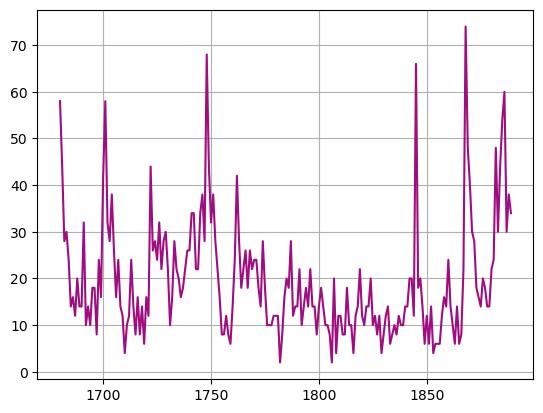

In [20]:
plt.plot(x3, y, color='#9F0D7F')
plt.grid(True)
plt.show()